CONTENT

This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. This is a compiled version. This contains data over a period of 7 years.
There are total 7385 rows and 12 columns. There are few abbreviations that has been used to describe the features. I am listing them out here. The same can be found in the Data Description sheet.

**Model**

- 4WD/4X4 = Four-wheel drive
- AWD = All-wheel drive
- FFV = Flexible-fuel vehicle
- SWB = Short wheelbase
- LWB = Long wheelbase
- EWB = Extended wheelbase

**Transmission**

- A = Automatic
- AM = Automated manual
- AS = Automatic with select shift
- AV = Continuously variable
- M = Manual
- 3 - 10 = Number of gears


**Fuel type**

- X = Regular gasoline
- Z = Premium gasoline
- D = Diesel
- E = Ethanol (E85)
- N = Natural gas
- Fuel Consumption

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)
CO2 Emissions

Target: the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

ACKNOWLEDGEMENTS
The data has been taken and compiled from the below Canada Government official link
https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv('./data/co2_emissions_Canada.csv')
df

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[7385 rows x 12 columns]

In [22]:
df['Fuel Type'].value_counts()

Fuel Type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [54]:
df[df['Fuel Type'] == 'X'][['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']].corr(numeric_only=True)

Fuel Consumption Comb (L/100 km)  \
Fuel Consumption Comb (L/100 km)                          1.000000   
CO2 Emissions(g/km)                                       0.999104   

                                  CO2 Emissions(g/km)  
Fuel Consumption Comb (L/100 km)             0.999104  
CO2 Emissions(g/km)                          1.000000

In [55]:
df[df['Fuel Type'] == 'Z'][['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']].corr(numeric_only=True)

Fuel Consumption Comb (L/100 km)  \
Fuel Consumption Comb (L/100 km)                           1.00000   
CO2 Emissions(g/km)                                        0.99867   

                                  CO2 Emissions(g/km)  
Fuel Consumption Comb (L/100 km)              0.99867  
CO2 Emissions(g/km)                           1.00000

In [56]:
df[df['Fuel Type'] == 'E'][['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']].corr(numeric_only=True)

Fuel Consumption Comb (L/100 km)  \
Fuel Consumption Comb (L/100 km)                          1.000000   
CO2 Emissions(g/km)                                       0.990724   

                                  CO2 Emissions(g/km)  
Fuel Consumption Comb (L/100 km)             0.990724  
CO2 Emissions(g/km)                          1.000000

In [27]:
df.Model.unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

In [5]:
df['Make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [6]:
df['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [7]:
df['Engine Size(L)'].unique()

array([2. , 2.4, 1.5, 3.5, 3.7, 1.8, 5.9, 4.7, 3. , 4. , 6.3, 4.2, 5.2,
       6. , 6.8, 4.4, 3.6, 1.4, 2.5, 6.2, 4.3, 5.3, 4.8, 1.2, 5.7, 6.4,
       4.6, 5.4, 1.6, 5. , 1. , 5.8, 3.8, 3.3, 5.6, 3.2, 6.5, 5.5, 2.1,
       3.4, 2.7, 6.6, 6.7, 1.3, 8.4, 2.3, 2.8, 0.9, 2.9, 8. , 2.2])

In [8]:
df.Transmission.unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [9]:
df['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [ ]:
fuel_df = pd.get_dummies(df, columns=[ 'Fuel Type'], dtype=float)
fuel_df

In [10]:
fuel_df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'Fuel Type_E',
       'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z'],
      dtype='object')

In [11]:
X = fuel_df[['Fuel Consumption Comb (L/100 km)', 'Fuel Type_E',
       'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z']]

y = fuel_df[['CO2 Emissions(g/km)']]
y = np.ravel(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train

Fuel Consumption Comb (L/100 km)  Fuel Type_E  Fuel Type_N  Fuel Type_X  \
6590                               9.9          0.0          0.0          0.0   
6274                              12.7          0.0          0.0          1.0   
2251                              11.7          0.0          0.0          0.0   
3149                               9.8          0.0          0.0          0.0   
4362                               8.7          0.0          0.0          0.0   
...                                ...          ...          ...          ...   
5191                               9.0          0.0          0.0          0.0   
5226                               9.1          0.0          0.0          1.0   
5390                              10.4          0.0          0.0          1.0   
860                                8.6          0.0          0.0          1.0   
7270                              11.9          0.0          0.0          0.0   

      Fuel Type_Z  
6590          1.0  
6274          0.0  
2251          1.0  
3149          1.0  
4362          1.0  
...           ...  
5191          1.0  
5226          0.0  
5390          0.0  
860           0.0  
7270          1.0  

[5908 rows x 5 columns]

In [14]:
y_train

array([231, 299, 273, ..., 242, 198, 279], dtype=int64)

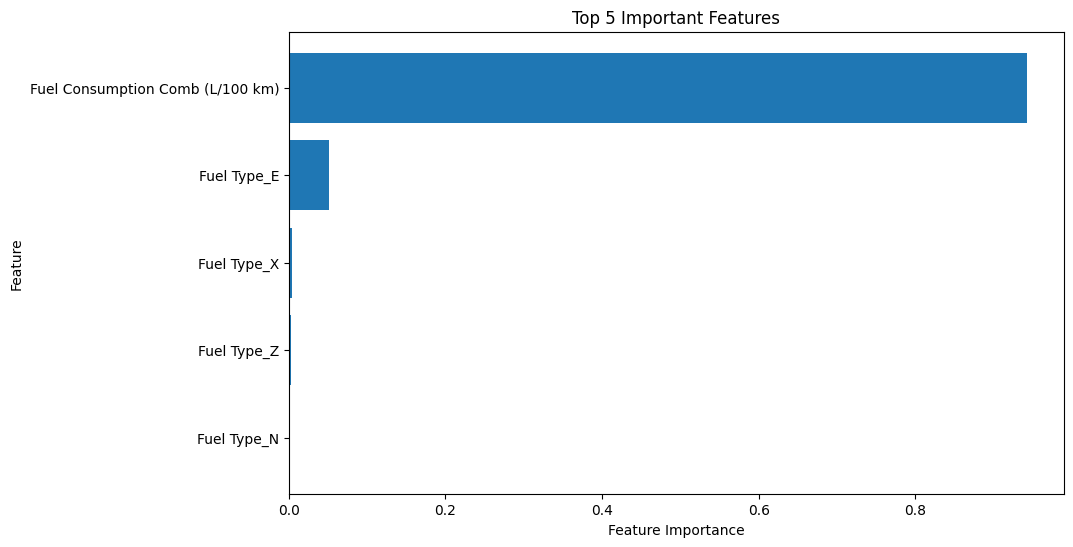

In [15]:
# Initialize a Random Forest Classifier
rf_classifier = RandomForestRegressor(random_state=42)

# Fit the pipeline on your data
rf_classifier.fit(X_train, y_train)

# Get feature importances from the trained Random Forest Classifier
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})

# Sort features by importance score (descending order)
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot the top N important features
top_n = 5  # Change this value to plot more or fewer features
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importance_df["Importance"][:top_n], align="center")
plt.yticks(range(top_n), feature_importance_df["Feature"][:top_n])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top {} Important Features".format(top_n))
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

In [23]:
X = fuel_df[['Fuel Consumption Comb (L/100 km)', 'Fuel Type_E',
       'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z']]

y = fuel_df[['CO2 Emissions(g/km)']]
y = np.ravel(y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.metrics import mean_squared_error

classifiers = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor()
]

scaler = StandardScaler()

for classifier in classifiers:
    pipe = make_pipeline(scaler, classifier)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring='r2')
    grid.fit(X_train, y_train)

    print(f'Train score for {classifier}: {grid.best_score_}')
    print()

Train score for LinearRegression(): 0.9911958165254406

Train score for DecisionTreeRegressor(): 0.9972423196872761

Train score for RandomForestRegressor(): 0.9970136229336128

Train score for KNeighborsRegressor(): 0.9967938228866245



In [57]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse_scorer(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return -rmse  # Note the negative sign; GridSearchCV tries to maximize the scoring function

# Create the RMSE scorer
rmse_scorer = make_scorer(rmse_scorer)


In [59]:
param_grid_rf = {
    'randomforestregressor__min_samples_leaf': [3, 4],
    'randomforestregressor__max_depth': [None, 1, 2, 3],
    'randomforestregressor__n_estimators': [90, 100, 120] 
}

regressor = RandomForestRegressor()
pipe = make_pipeline(scaler, regressor)

grid_rf = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid_rf,
    cv=5, 
    scoring={'r2': 'r2', 'rmse': rmse_scorer},
    refit='r2'  # Specify 'r2' as the metric for refitting
)

grid_rf.fit(X_train, y_train)

print('Best R-squared score:', grid_rf.best_score_)
print('Best params:', grid_rf.best_params_)

# Access RMSE from the grid search results
rmse_scores = np.sqrt(-grid_rf.cv_results_['mean_test_rmse'])  # Note the negative sign
best_rmse_idx = np.argmin(rmse_scores)
print('Best RMSE score:', rmse_scores[best_rmse_idx])
print('Best RMSE params:', grid_rf.cv_results_['params'][best_rmse_idx])



Best R-squared score: 0.9947003361474988
Best params: {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__n_estimators': 120}
Best RMSE score: 2.053143075756441
Best RMSE params: {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__n_estimators': 120}


The RMSE (Root Mean Squared Error) is a commonly used metric for evaluating the performance of regression models. It measures the average magnitude of the errors between the predicted values and the actual values. Specifically, the RMSE is calculated as follows:

Calculate the squared difference between each predicted value and its corresponding actual value.
Take the mean (average) of these squared differences.
Finally, take the square root of the mean to obtain the RMSE.

In your case, you have obtained an RMSE score of approximately 2.053. Here's how to interpret this:

The RMSE value represents the average absolute error between the predicted CO2 emissions and the actual CO2 emissions.
Lower RMSE values indicate better model performance, as they suggest that the model's predictions are closer to the actual values on average.
An RMSE of 2.053 suggests that, on average, your model's predictions for CO2 emissions are off by approximately 2.053 grams per kilometer.
You can think of it as a measure of how well your model's predictions align with the actual data. In this context, an RMSE of 2.053 may be considered quite good, but the interpretation depends on the specific domain and context of your regression problem.

The R-squared (R2) score is a statistical measure that represents the proportion of the variance in the dependent variable (in your case, CO2 emissions) that is explained by the independent variables (features) in your regression model. It is a value between 0 and 1, where:

R2 = 0: The model does not explain any of the variance in the dependent variable, indicating a poor fit.
R2 = 1: The model explains all of the variance in the dependent variable, indicating a perfect fit.

In your case, you have obtained an R-squared score of approximately 0.995. Here's how to interpret this score:

An R2 score of 0.995 is very close to 1, which suggests that your regression model is an excellent fit for the data.
It indicates that about 99.5% of the variance in CO2 emissions can be explained by the features (independent variables) included in your model.
In practical terms, this means that your model is highly effective at predicting CO2 emissions based on the selected features.

In [28]:
param_grid_rf = {
    'randomforestregressor__min_samples_leaf': [3, 4 ],
    'randomforestregressor__max_depth': [None, 1, 2, 3],
    'randomforestregressor__n_estimators': [90, 100, 120] 
}

regressor = RandomForestRegressor()
pipe = make_pipeline(scaler, regressor)

grid_rf = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid_rf,
    cv=5, 
    scoring='r2'  # Use an appropriate scoring metric for regression, like 'r2' for coefficient of determination
)

grid_rf.fit(X_train, y_train)

print('Best score:', grid_rf.best_score_)
print('Best params:', grid_rf.best_params_)

Best score: 0.9947913684134086
Best params: {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__n_estimators': 100}


In [29]:
score = grid_rf.score(X_test, y_test)
params = grid_rf.best_params_

print(f"Score for RF: {score}")
print(f"With parameters {params}\n")

Score for RF: 0.9944399271561988
With parameters {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__n_estimators': 100}



In [32]:
y_test = grid_rf.predict(X_test)
y_test

array([253.74946096, 341.45033837, 324.18579444, ..., 181.61210676,
       237.38176313, 191.84690299])

In [34]:
X_test['co2_pred'] = y_test

In [37]:
X_test[:20].index

Index([7261, 4489, 1539, 3532, 6418, 3703, 5976, 4332, 5015, 2087, 2126, 4161,
       4814,  486, 6607, 1128, 5159, 5391, 6643, 6003],
      dtype='int64')

In [41]:
y_test[:20]

array([253.74946096, 341.45033837, 324.18579444, 296.5015756 ,
       309.63606953, 400.94834858, 241.48381523, 216.82946069,
       244.9240695 , 225.63914699, 286.81594043, 322.30262496,
       275.95778423, 254.45579495, 321.6990523 , 386.29837426,
       246.31270431, 193.34590329, 203.23777556, 210.1593333 ])

In [42]:
df.iloc[[7261, 4489, 1539, 3532, 6418, 3703, 5976, 4332, 5015, 2087, 2126, 4161,
       4814,  486, 6607, 1128, 5159, 5391, 6643, 6003]]['CO2 Emissions(g/km)']

7261    253
4489    344
1539    322
3532    297
6418    308
3703    406
5976    242
4332    216
5015    246
2087    223
2126    283
4161    326
4814    274
486     251
6607    322
1128    382
5159    248
5391    193
6643    204
6003    211
Name: CO2 Emissions(g/km), dtype: int64

In [122]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [150]:
all_cats_df = pd.get_dummies(df, columns=['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype=float)
all_cats_df.shape

(7385, 2150)

In [151]:
X = all_cats_df.drop(columns=['CO2 Emissions(g/km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'Fuel Consumption City (L/100 km)'])

y = all_cats_df['CO2 Emissions(g/km)']

In [152]:
X.shape

(7385, 2145)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.2)

In [154]:
for classifier in classifiers:
    pipe = make_pipeline(scaler, classifier)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring='r2')
    grid.fit(X_train, y_train)

    print(f'Train score for {classifier}: {grid.best_score_}')
    print()

Train score for LinearRegression(): -2.8881377007338698e+26

Train score for DecisionTreeRegressor(): 0.8659992995254202

Train score for RandomForestRegressor(): 0.9020500262054583

Train score for KNeighborsRegressor(): 0.2641353230000606



In [161]:
param_grid_rf = {
    'randomforestregressor__min_samples_leaf': [2, 3, 4],
    'randomforestregressor__max_depth': [None, 1, 2, 3],
    'randomforestregressor__n_estimators': [90, 100, 120] 
}

regressor2 = RandomForestRegressor()
pipe = make_pipeline(scaler, regressor2)

grid_rf2 = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid_rf,
    cv=5, 
    scoring={'r2': 'r2', 'rmse': rmse_scorer},
    refit='r2'  # Specify 'r2' as the metric for refitting
)

grid_rf2.fit(X_train, y_train)

print('Best R-squared score:', grid_rf2.best_score_)
print('Best params:', grid_rf2.best_params_)

# Access RMSE from the grid search results
rmse_scores = np.sqrt(-grid_rf2.cv_results_['mean_test_rmse'])  # Note the negative sign
best_rmse_idx = np.argmin(rmse_scores)
print('Best RMSE score:', rmse_scores[best_rmse_idx])
print('Best RMSE params:', grid_rf2.cv_results_['params'][best_rmse_idx])

Best R-squared score: 0.8970561253898399
Best params: {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__n_estimators': 100}
Best RMSE score: 4.363867377541013
Best RMSE params: {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__n_estimators': 100}


In [155]:
no_model_cats_df = pd.get_dummies(df, columns=['Make', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype=float)
no_model_cats_df.shape

(7385, 98)

In [156]:
X = no_model_cats_df.drop(columns=['CO2 Emissions(g/km)', 'Fuel Consumption City (L/100 km)', 
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'Model'])

y = no_model_cats_df['CO2 Emissions(g/km)']

In [158]:
X.shape

(7385, 92)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.2)

In [160]:
for classifier in classifiers:
    pipe = make_pipeline(scaler, classifier)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring='r2')
    grid.fit(X_train, y_train)

    print(f'Train score for {classifier}: {grid.best_score_}')
    print()

Train score for LinearRegression(): -1.3442972350808614e+26

Train score for DecisionTreeRegressor(): 0.87093085934365

Train score for RandomForestRegressor(): 0.9041269237641838

Train score for KNeighborsRegressor(): 0.7216275474610634



In [162]:
param_grid_rf = {
    'randomforestregressor__min_samples_leaf': [2, 3, 4],
    'randomforestregressor__max_depth': [None, 1, 2, 3],
    'randomforestregressor__n_estimators': [90, 100, 120] 
}

regressor3 = RandomForestRegressor()
pipe = make_pipeline(scaler, regressor3)

grid_rf3 = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid_rf,
    cv=5, 
    scoring={'r2': 'r2', 'rmse': rmse_scorer},
    refit='r2'  # Specify 'r2' as the metric for refitting
)

grid_rf3.fit(X_train, y_train)

print('Best R-squared score:', grid_rf3.best_score_)
print('Best params:', grid_rf3.best_params_)

# Access RMSE from the grid search results
rmse_scores = np.sqrt(-grid_rf3.cv_results_['mean_test_rmse'])  # Note the negative sign
best_rmse_idx = np.argmin(rmse_scores)
print('Best RMSE score:', rmse_scores[best_rmse_idx])
print('Best RMSE params:', grid_rf3.cv_results_['params'][best_rmse_idx])

Best R-squared score: 0.8976299397237112
Best params: {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__n_estimators': 120}
Best RMSE score: 4.359605110423592
Best RMSE params: {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__n_estimators': 120}


In [163]:
score = grid_rf3.score(X_test, y_test)
params = grid_rf3.best_params_

print(f"Score for RF: {score}")
print(f"With parameters {params}\n")

Score for RF: 0.9100810583847483
With parameters {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__n_estimators': 120}



CatBoost is capable of handling categorical variables without requiring explicit one-hot encoding. CatBoost is a gradient boosting algorithm that can naturally handle categorical features through an internal technique called "ordered boosting" or "ordered categorical encoding."

Here's how CatBoost works with categorical features:

Categorical Variable Handling: CatBoost can directly take categorical features as input without the need to one-hot encode them. You can specify which features are categorical, and CatBoost will internally handle the encoding.

CatBoost Encoding: CatBoost uses a technique known as "ordered boosting" for categorical encoding. It sorts the categories within each feature by the target variable's mean, and then it encodes them accordingly. This means that the encoding is data-driven and optimized for the specific dataset.

Efficient Training: CatBoost optimizes the training process to work efficiently with categorical features. It avoids the need for large memory usage that can occur with one-hot encoding.

Automatic Feature Importance: CatBoost can provide feature importance scores, including those for categorical features, which can be useful for understanding the impact of different features on the model's predictions.

Because of these capabilities, CatBoost is a powerful choice for working with datasets that contain a mix of categorical and numerical features. It can effectively model relationships between these features and make accurate predictions without extensive preprocessing.

However, it's essential to specify which features are categorical when training a CatBoost model by using the cat_features parameter, and CatBoost will handle the rest.

In [61]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [105]:
df_no_fuel = df.drop(columns=['Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)'])

In [115]:
df_no_fuel.Model.value_counts()[:200]

Model
F-150 FFV 4X4    32
F-150 FFV        32
MUSTANG          27
FOCUS FFV        24
SONIC            20
                 ..
SPORTAGE          8
MKX AWD           8
Mustang           8
A8                8
MAZDA5            8
Name: count, Length: 200, dtype: int64

In [95]:
df_no_fuel.corr(numeric_only=True)

Engine Size(L)  Cylinders  CO2 Emissions(g/km)
Engine Size(L)             1.000000   0.927653             0.851145
Cylinders                  0.927653   1.000000             0.832644
CO2 Emissions(g/km)        0.851145   0.832644             1.000000

In [96]:
# Import necessary libraries
import catboost
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

## With Model
3 (iterations) * 3 (learning rates) * 3 (depths) = 27 different models.

In [119]:
# Import necessary libraries
import catboost
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

categorical_features = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df_no_fuel, columns=categorical_features)

# Select features (independent variables) and the target variable
X = df_encoded.drop(columns=['CO2 Emissions(g/km)'])  # Features
y = df_encoded['CO2 Emissions(g/km)']  # Target variable

cat_feature_indices = [X.columns.get_loc(cat_feature) for cat_feature in X.columns if any(cat_feature.startswith(cat) for cat in categorical_features)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a grid of hyperparameters to search
param_grid_catboost = {
    'iterations': [1000, 1500, 2000],  # Number of boosting iterations
    'learning_rate': [0.1, 0.05, 0.01],  # Learning rate
    'depth': [6, 8, 10],  # Depth of the trees
}

# Initialize the CatBoost Regressor
catboost_model = CatBoostRegressor(loss_function='RMSE',  # Loss function (Root Mean Squared Error)
                                   cat_features=cat_feature_indices,  # Indices of categorical features
                                   random_seed=42  # Random seed for reproducibility
                                   )

# Initialize the Grid Search with cross-validation
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid_catboost,
                           scoring='neg_mean_squared_error',  # Use negative RMSE as the scoring metric
                           cv=5  # Number of cross-validation folds
                           )

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the Grid Search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best CatBoost model from the Grid Search
best_catboost_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_test_pred = best_catboost_model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE) on the test set
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print("RMSE:", rmse)

# Calculate R-squared (R2) on the test set
r2 = r2_score(y_test, y_test_pred)
print("R2:", r2)


0:	learn: 54.6879319	total: 8.86ms	remaining: 8.85s
1:	learn: 51.0501294	total: 19.3ms	remaining: 9.64s
2:	learn: 47.9660698	total: 29.2ms	remaining: 9.69s
3:	learn: 45.1207253	total: 38.8ms	remaining: 9.67s
4:	learn: 42.6122409	total: 49.9ms	remaining: 9.92s
5:	learn: 40.3820564	total: 58.9ms	remaining: 9.76s
6:	learn: 38.4120654	total: 68.5ms	remaining: 9.71s
7:	learn: 36.5780559	total: 79.5ms	remaining: 9.86s
8:	learn: 35.1007750	total: 88.3ms	remaining: 9.72s
9:	learn: 33.6848179	total: 98.8ms	remaining: 9.78s
10:	learn: 32.5427866	total: 108ms	remaining: 9.73s
11:	learn: 31.4398862	total: 118ms	remaining: 9.69s
12:	learn: 30.5351328	total: 128ms	remaining: 9.72s
13:	learn: 29.7254682	total: 137ms	remaining: 9.66s
14:	learn: 28.9456863	total: 148ms	remaining: 9.72s
15:	learn: 28.2893372	total: 157ms	remaining: 9.68s
16:	learn: 27.7538433	total: 166ms	remaining: 9.63s
17:	learn: 27.3230342	total: 176ms	remaining: 9.61s
18:	learn: 26.7415162	total: 186ms	remaining: 9.58s
19:	learn: 2

KeyboardInterrupt: 

## Without Model

In [ ]:
categorical_features = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']

# Select features (independent variables) and the target variable
X = df_encoded.drop(columns=['CO2 Emissions(g/km)', 'Model'])  # Features
y = df_encoded['CO2 Emissions(g/km)']  # Target variable

cat_feature_indices = [X.columns.get_loc(cat_feature) for cat_feature in X.columns if any(cat_feature.startswith(cat) for cat in categorical_features)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a grid of hyperparameters to search
param_grid_catboost = {
    'iterations': [1000, 1500, 2000],  # Number of boosting iterations
    'learning_rate': [0.1, 0.05, 0.01],  # Learning rate
    'depth': [6, 8, 10],  # Depth of the trees
}

# Initialize the CatBoost Regressor
catboost_model2 = CatBoostRegressor(loss_function='RMSE',  # Loss function (Root Mean Squared Error)
                                   cat_features=cat_feature_indices,  # Indices of categorical features
                                   random_seed=42  # Random seed for reproducibility
                                   )

# Initialize the Grid Search with cross-validation
grid_search2 = GridSearchCV(estimator=catboost_model2, param_grid=param_grid_catboost,
                           scoring='neg_mean_squared_error',  # Use negative RMSE as the scoring metric
                           cv=5  # Number of cross-validation folds
                           )

# Fit the Grid Search to the training data
grid_search2.fit(X_train, y_train)

# Get the best hyperparameters from the Grid Search
best_params = grid_search2.best_params_
print("Best Hyperparameters:", best_params)

# Get the best CatBoost model from the Grid Search
best_catboost_model2 = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_test_pred2 = best_catboost_model2.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE) on the test set
rmse = mean_squared_error(y_test, y_test_pred2, squared=False)
print("RMSE:", rmse)

# Calculate R-squared (R2) on the test set
r2 = r2_score(y_test, y_test_pred2)
print("R2:", r2)


In [106]:
categorical_features = ['Make', 'Model', 'Vehicle Class','Transmission', 'Fuel Type']

# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df_no_fuel, columns=categorical_features)

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
# Assuming your dataset is stored in a DataFrame called 'df'
# Make sure you preprocess your data and handle categorical variables appropriately

# Select features (independent variables) and the target variable
X = df_no_fuel.drop(columns=['CO2 Emissions(g/km)'])  # Features
y = df_no_fuel['CO2 Emissions(g/km)']  # Target variable

cat_feature_indices = [X.columns.get_loc(cat_feature) for cat_feature in X.columns if any(cat_feature.startswith(cat) for cat in categorical_features)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=1000,  # Number of boosting iterations
                                   learning_rate=0.1,  # Learning rate
                                   depth=6,  # Depth of the trees
                                   random_seed=42,  # Random seed for reproducibility
                                   loss_function='RMSE',  # Loss function (Root Mean Squared Error)
                                   cat_features=cat_feature_indices,  # Indices of categorical features
                                   )

# Fit the CatBoost model to the training data
catboost_model.fit(X_train, y_train, verbose=200)  # Use verbose to see progress during training

# Make predictions on the train set
y_train_pred = catboost_model.predict(X_train)

# Calculate the Root Mean Squared Error (RMSE) on the train set
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("RMSE:", rmse)

# Calculate R-squared (R2) on the train set
r2 = r2_score(y_train, y_train_pred)
print("R2:", r2)

0:	learn: 54.1106067	total: 43.4ms	remaining: 43.4s
200:	learn: 14.2187256	total: 10.2s	remaining: 40.6s
400:	learn: 11.9333064	total: 20.4s	remaining: 30.4s
600:	learn: 10.6774017	total: 30.7s	remaining: 20.4s
800:	learn: 9.8032515	total: 40s	remaining: 9.93s
999:	learn: 9.1281895	total: 50.2s	remaining: 0us
RMSE: 9.67235052715055
R2: 0.9726333279317798


## No Model

In [118]:
categorical_features = ['Make', 'Vehicle Class','Transmission', 'Fuel Type']

# Select features (independent variables) and the target variable
X = df_no_fuel.drop(columns=['CO2 Emissions(g/km)', 'Model'])  # Features
y = df_no_fuel['CO2 Emissions(g/km)']  # Target variable

cat_feature_indices = [X.columns.get_loc(cat_feature) for cat_feature in X.columns if any(cat_feature.startswith(cat) for cat in categorical_features)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost Regressor
catboost_model2 = CatBoostRegressor(iterations=1000,  # Number of boosting iterations
                                   learning_rate=0.1,  # Learning rate
                                   depth=6,  # Depth of the trees
                                   random_seed=42,  # Random seed for reproducibility
                                   loss_function='RMSE',  # Loss function (Root Mean Squared Error)
                                   cat_features=cat_feature_indices,  # Indices of categorical features
                                   )

# Fit the CatBoost model to the training data
catboost_model2.fit(X_train, y_train, verbose=200)  # Use verbose to see progress during training

# Make predictions on the train set
y_train_pred = catboost_model2.predict(X_train)

# Calculate the Root Mean Squared Error (RMSE) on the train set
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("RMSE:", rmse)

# Calculate R-squared (R2) on the train set
r2 = r2_score(y_train, y_train_pred)
print("R2:", r2)

0:	learn: 54.4468112	total: 48.8ms	remaining: 48.7s
200:	learn: 15.0185110	total: 11s	remaining: 43.7s
400:	learn: 13.0431337	total: 21.5s	remaining: 32.1s
600:	learn: 12.0275404	total: 31.5s	remaining: 20.9s
800:	learn: 11.3507971	total: 41.3s	remaining: 10.3s
999:	learn: 10.8711938	total: 51.4s	remaining: 0us
RMSE: 11.849608424814443
R2: 0.9589261008570373


In [99]:
y_pred = catboost_model.predict(X_test)

In [100]:
# Calculate the Root Mean Squared Error (RMSE) on the test set
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 13.946099100743186


In [102]:
# Calculate R-squared (R2) on the test set
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

R2: 0.9434550151257809


In [103]:
y_test

7261    253
4489    344
1539    322
3532    297
6418    308
       ... 
7185    221
1740    260
4609    184
1844    235
5154    193
Name: CO2 Emissions(g/km), Length: 1477, dtype: int64

In [104]:
catboost_model.predict(X_test)

array([247.67418583, 337.35538319, 327.90035874, ..., 187.64597033,
       225.81129997, 202.38629135])